In [1]:
from functions import kddDfEncode
from functions import kddPearsonCorr
from functions import saveList
from functions import retainFeatures
from functions import analyze
import pandas as pd
import numpy as np




dataset_file = 'datasets/kddcup.data_10_percent_corrected.csv'
feature_names = pd.read_csv('datasets/feature_names.csv', header=None)
kdd_names = feature_names.iloc[:,0].values

kdd = pd.read_csv(dataset_file, names=kdd_names)


In [2]:
kddEncoded = kddDfEncode(kdd)

In [ ]:
#kddPearsonCorr(kddEncoded)

In [3]:
kddSelected = retainFeatures(kddEncoded,2) #retains top N features via pearson correlation list

In [4]:
kddEncoded.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,attack_type
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,normal.
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,normal.
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,normal.
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,normal.
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,normal.


In [5]:
X = kddEncoded.drop(columns='attack_type')
X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
494017,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
494018,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
494019,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit_transform(X.values)

In [7]:
X_scaled = pd.DataFrame(scaler1, index=X.index, columns=X.columns)
#X_scaled = retainFeatures(X_scaled,20)
X_scaled

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,-0.067792,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.032241,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924
1,-0.067792,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.032241,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924
2,-0.067792,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.032241,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924
3,-0.067792,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.032241,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924
4,-0.067792,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.032241,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.067792,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.032241,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924
494017,-0.067792,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.032241,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924
494018,-0.067792,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.032241,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924
494019,-0.067792,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.032241,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924


In [8]:
Y = kddEncoded['attack_type']

In [9]:
Y_encoded = pd.get_dummies(Y, columns='attack_type')

In [10]:
Y_encoded

,R2L,U2R,dos,normal.,probe
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
494016,0,0,0,1,0
494017,0,0,0,1,0
494018,0,0,0,1,0
494019,0,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y_encoded, test_size=0.4, random_state=42)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(10, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(50, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(10, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(Y_encoded.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.5,
          callbacks=[monitor],verbose=2,epochs=1000)
        

Epoch 1/1000
4632/4632 - 5s - loss: 0.2372 - val_loss: 0.0631 - 5s/epoch - 1ms/step
Epoch 2/1000
4632/4632 - 4s - loss: 0.0404 - val_loss: 0.0303 - 4s/epoch - 913us/step
Epoch 3/1000
4632/4632 - 4s - loss: 0.0244 - val_loss: 0.0247 - 4s/epoch - 917us/step
Epoch 4/1000
4632/4632 - 4s - loss: 0.0192 - val_loss: 0.0226 - 4s/epoch - 927us/step
Epoch 5/1000
4632/4632 - 4s - loss: 0.0167 - val_loss: 0.0227 - 4s/epoch - 940us/step
Epoch 6/1000
4632/4632 - 4s - loss: 0.0164 - val_loss: 0.0281 - 4s/epoch - 954us/step
Epoch 7/1000
4632/4632 - 5s - loss: 0.0167 - val_loss: 0.0248 - 5s/epoch - 984us/step
Epoch 8/1000
4632/4632 - 5s - loss: 0.0147 - val_loss: 0.0248 - 5s/epoch - 1ms/step
Epoch 9/1000
Restoring model weights from the end of the best epoch: 4.
4632/4632 - 4s - loss: 0.0144 - val_loss: 0.0255 - 4s/epoch - 965us/step
Epoch 00009: early stopping


In [14]:
X_scaled.shape[1]

118

In [15]:
from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

Validation score: 0.9965133167011624


array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [16]:
print((y_test['R2L'] == 1).sum())
print((y_test['U2R'] == 1).sum())
print((y_test['dos'] == 1).sum())
print((y_test['normal.'] == 1).sum())
print((y_test['probe'] == 1).sum())

454
21
156539
38977
1618


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [18]:
cm = confusion_matrix(y_eval, pred)

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['r2l','u2r','dos','normal','probe'])

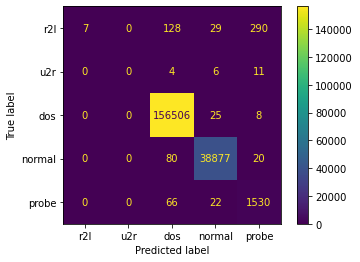

In [20]:
disp.plot()


In [21]:
kddScaled = pd.concat([X_scaled, Y],axis=1)

In [22]:
kddScaled

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,attack_type
0,-0.067792,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924,normal.
1,-0.067792,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924,normal.
2,-0.067792,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924,normal.
3,-0.067792,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924,normal.
4,-0.067792,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.067792,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924,normal.
494017,-0.067792,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924,normal.
494018,-0.067792,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924,normal.
494019,-0.067792,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,-0.001423,-0.003764,-0.01783,-0.005324,-0.033018,-0.01465,-0.01465,-0.01465,-0.014924,normal.


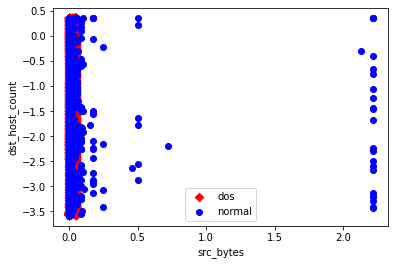

In [23]:
from matplotlib import pyplot as plt

plt.scatter(kddScaled['src_bytes'][(kddScaled.attack_type == 'dos') | (kddScaled.attack_type == 'dos')],
            kddScaled['dst_host_count'][(kddScaled.attack_type == 'dos') | (kddScaled.attack_type == 'dos')],
           marker='D',
           color='red',
           label='dos')
plt.scatter(kddScaled['src_bytes'][kddScaled.attack_type == 'normal.'],
            kddScaled['dst_host_count'][kddScaled.attack_type == 'normal.'],
           marker='o',
           color='blue',
           label='normal')
plt.xlabel('src_bytes')
plt.ylabel('dst_host_count')
plt.legend()
plt.show()




SVM

In [25]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo', verbose=True)

In [28]:
x_svm_train, x_svm_test, y_svm_train, y_svm_test = train_test_split(
    retainFeatures(X_scaled,19), Y, test_size=0.4, random_state=42)

In [29]:
x_svm_train

,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,protocol_type_icmp,protocol_type_tcp,service_ecr_i,service_http
475472,-0.003062,-0.026287,-0.417192,-0.569023,-1.176939,-2.013316,0.596282,-0.203633,0.347967,-1.750897,-1.810650,0.357813,-1.250621,-0.158629,-0.464418,-1.160946,1.264603,-1.150427,-0.386799
442190,-0.002535,-0.026287,-0.417192,0.838455,0.885398,0.536987,-0.255243,-0.203633,0.347967,0.625558,0.599396,-0.282867,0.827048,-0.158629,-0.464418,0.861366,-0.790762,0.869243,-0.386799
417391,-0.002535,-0.026287,-0.417192,0.838455,0.885398,0.536987,-0.255243,-0.203633,0.347967,0.625558,0.599396,-0.282867,0.827048,-0.158629,-0.464418,0.861366,-0.790762,0.869243,-0.386799
222397,-0.002017,-0.026287,-0.417192,0.838455,0.885398,0.536987,-0.255243,-0.203633,0.347967,0.625558,0.599396,-0.282867,0.827048,-0.158629,-0.464418,0.861366,-0.790762,0.869243,-0.386799
423700,-0.002535,-0.026287,-0.417192,0.838455,0.885398,0.536987,-0.255243,-0.203633,0.347967,0.625558,0.599396,-0.282867,0.827048,-0.158629,-0.464418,0.861366,-0.790762,0.869243,-0.386799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,-0.002017,-0.026287,-0.417192,0.838455,0.885398,0.536987,-0.255243,-0.203633,0.347967,0.625558,0.599396,-0.282867,0.827048,-0.158629,-0.464418,0.861366,-0.790762,0.869243,-0.386799
365838,-0.003062,-0.026287,-0.417192,-1.066332,-1.168819,-1.910273,0.596282,-0.203633,0.347967,-1.703745,-1.761962,0.266287,-1.250621,-0.158629,2.163063,-1.160946,1.264603,-1.150427,-0.386799
131932,-0.002017,-0.026287,-0.417192,0.838455,0.885398,0.536987,-0.255243,-0.203633,0.347967,0.625558,0.599396,-0.282867,0.827048,-0.158629,-0.464418,0.861366,-0.790762,0.869243,-0.386799
146867,-0.002913,-0.023109,-0.417192,-1.554258,-1.185058,0.536987,-0.255243,-0.203633,0.347967,-1.750897,-1.810650,3.469685,0.494621,-0.158629,-0.464418,-1.160946,-0.790762,-1.150427,-0.386799


In [30]:
clf.fit(x_svm_train, y_svm_train)

[LibSVM]

SVC(decision_function_shape='ovo', verbose=True)

In [31]:
y_svm_predict = clf.predict(x_svm_test)

In [32]:
y_svm_predict

array(['dos', 'dos', 'dos', ..., 'dos', 'dos', 'dos'], dtype=object)

In [33]:

score = metrics.accuracy_score(y_svm_test, y_svm_predict)
print("Validation score: {}".format(score))


Validation score: 0.9935681067157872


In [44]:
print((y_svm_test=='R2L').sum())
print((y_svm_test=='U2R').sum())
print((y_svm_test=='dos').sum())
print((y_svm_test=='normal.').sum())
print((y_svm_test=='probe').sum())

454
21
156539
38977
1618


In [49]:
cm_svm = confusion_matrix(y_svm_test, y_svm_predict)

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=clf.classes_)

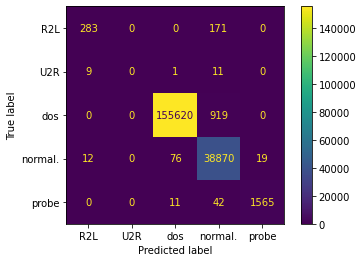

In [51]:
disp_svm.plot()